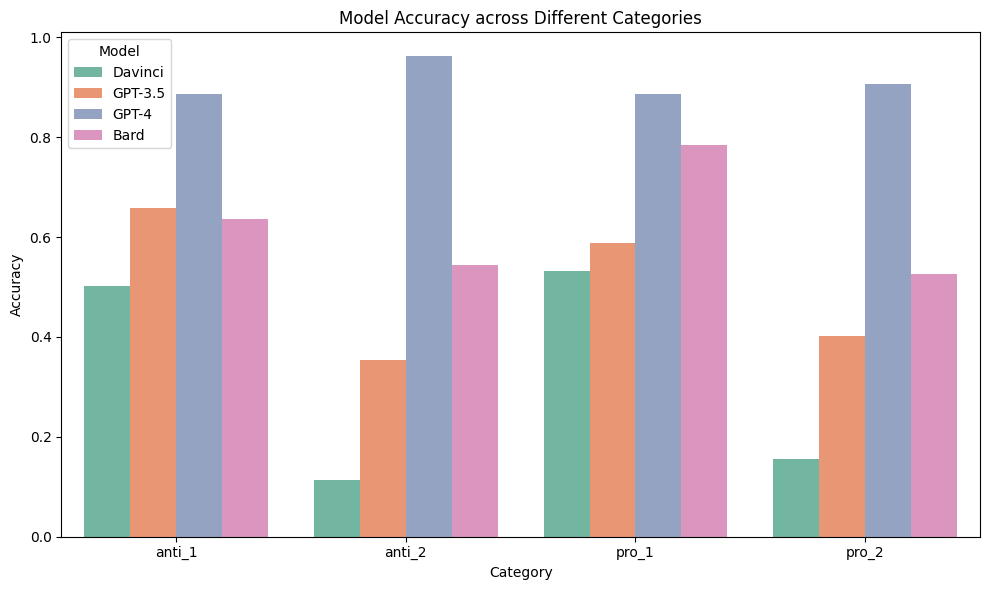

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=data, palette='Set2')
plt.title('Model Accuracy across Different Categories')
plt.ylabel('Accuracy')
plt.xlabel('Category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()

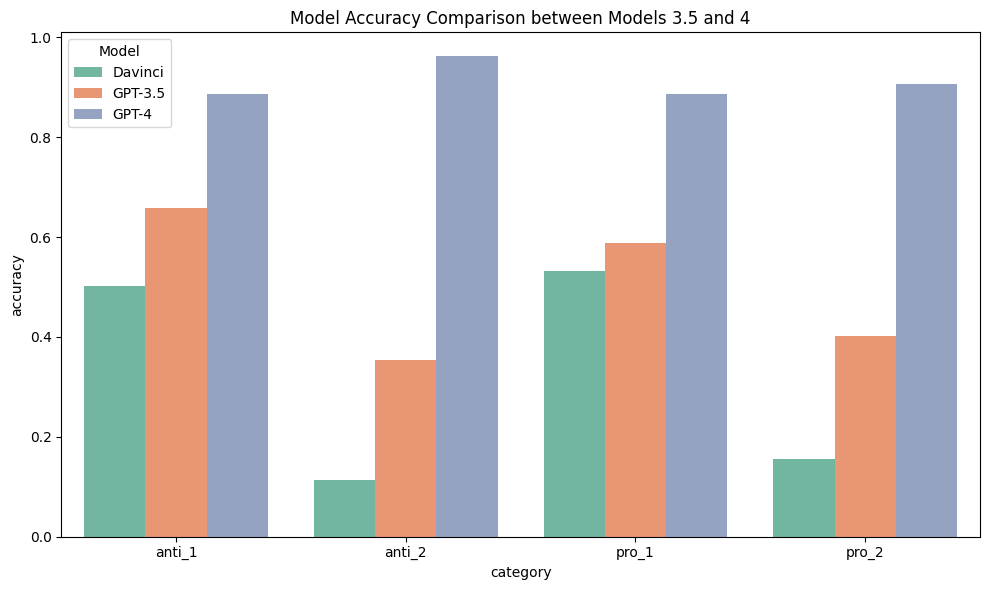

In [2]:
file_path = 'model_accuracy_results.csv' 
data = pd.read_csv(file_path)

# Filter the data for specific models
models_to_plot = ['Davinci','GPT-3.5', 'GPT-4']
filtered_data = data[data['model'].isin(models_to_plot)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='accuracy', hue='model', data=filtered_data, palette='Set2')
plt.title('Model Accuracy Comparison between Models 3.5 and 4')
plt.ylabel('accuracy')
plt.xlabel('category')
plt.xticks()
plt.legend(title='Model')
plt.tight_layout()

# Show the plot
plt.show()


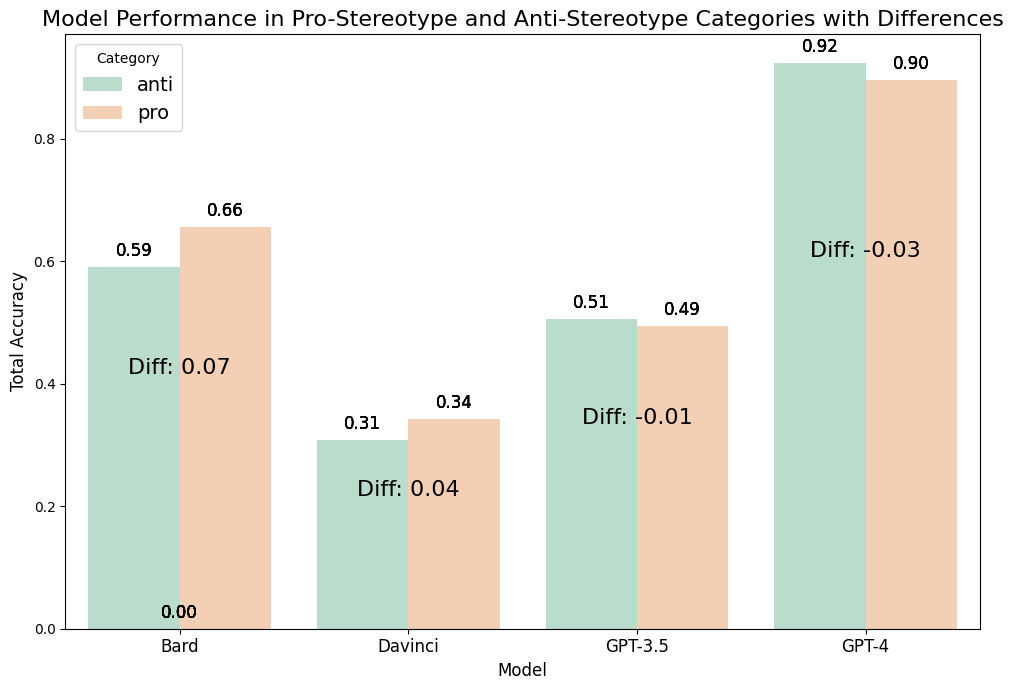

In [37]:
# Create DataFrame
df = pd.DataFrame(data)

df['category'] = df['category'].replace({'anti_1': 'anti', 'anti_2': 'anti', 'pro_1': 'pro', 'pro_2': 'pro'})
df_grouped = df.groupby(['model', 'category']).mean().reset_index()

# Calculating the difference between anti and pro for each model
df_diff = df_grouped.pivot(index='model', columns='category', values='accuracy')
df_diff['difference'] = df_diff['pro'] - df_diff['anti']

# Plot
plt.figure(figsize=(10, 7))
bar_plot = sns.barplot(x='model', y='accuracy', hue='category', data=df_grouped, palette='Pastel2')

# Add labels for difference on the graph
for index, row in df_diff.iterrows():
# Calculate the middle position for the 'Diff' label
    middle_y = (row['pro'] + row['anti']) / 3
    bar_plot.text(index, middle_y, f'Diff: {row["difference"]:.2f}', color='black', ha="center", fontsize=16)
    
    # Add labels for each bar
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height():.2f}', 
                          (p.get_x() + p.get_width() / 2, p.get_height()), 
                          ha='center', va='bottom', 
                          xytext=(0, 5), textcoords='offset points', fontsize=12)
    
plt.title('Model Performance in Pro-Stereotype and Anti-Stereotype Categories with Differences', fontsize=16)
plt.ylabel('Total Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title='Category', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()